<a href="https://colab.research.google.com/github/Kaitlynn218/Dark-Matter/blob/main/class_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This line of code allows us to import different library so we don't have to do complex coding or equations by hand

In [ ]:
import numpy as np
import astropy.units as u
import astropy.constants as ac
import matplotlib.pyplot as plt

This line of code allows us to import files from google colab to have our data in one place

In [ ]:
from google.colab import files

This line of code is letting us import the data from the file on github

In [ ]:
upload = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006 (2).txt


This line of code lets python read and write the data that we inputed

In [ ]:
import astropy.io.ascii

This line of code gives the data table that we inputed a name to allow for easier coding

In [ ]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

These lines tell python how to graph the data to give us a descriptive graph to better visualize the data

(0.0, 300.0)

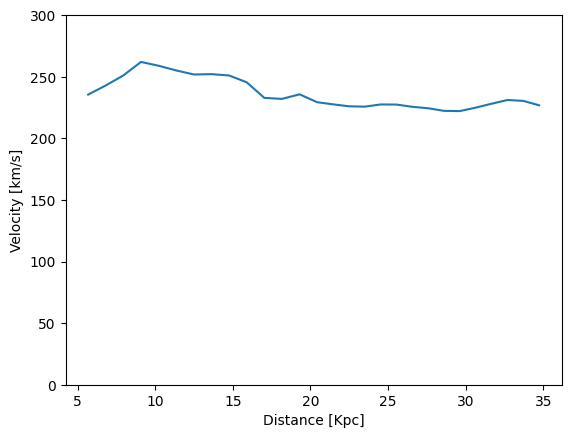

In [ ]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis,vel)
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0,300)

This line of code allows us to see the distance values easier

In [ ]:
print(dis)

 col2
-----
 5.68
 6.81
 7.95
 9.08
10.22
11.35
12.49
13.62
14.76
15.89
  ...
24.52
25.54
26.56
27.58
 28.6
29.62
30.65
31.67
32.69
33.71
34.73
Length = 28 rows


This line of code gives us a name for the function to make coding easier

In [ ]:
def calculate_orbital_velocity(mass, radius):
  return(np.sqrt(ac.G * mass / radius))

This line of code tells us what each value is equal to and shows us how to calculate orbital velocity and then calculates it for us

In [ ]:
mass = 1 * u.earthMass
radius = 1 * u.earthRad
orb_vel = calculate_orbital_velocity(mass, radius)
print(orb_vel.to(u.km / u.s))

7.905388234385281 km / s


This line of code tells us the orbital velocity of a black hole

In [ ]:
mass_bh = 3e7 * u.solMass
radius = 5.68 * 1000 * u.parsec
orb_vel = calculate_orbital_velocity(mass_bh, radius)
print(orb_vel.to(u.km / u.s))

4.766142291386287 km / s


This line of code gives us the functions for the velocity of a black hole to make the comparison easier

In [ ]:
vel_bh = np.zeros(np.shape(dis)) * u.km / u.s
# create a velocity array with the same number of elements as the distance array

for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec # gives a physical value to radius and labels it as rad
  orb_vel = calculate_orbital_velocity(mass_bh, rad)
  vel_bh[i] = orb_vel
  #print("The orbital velocity at", radius, "kpc = ", orb_vel.to(u.km / u.s))

This line of code allows us to visual the difference in velocity between the black hole and the data table we were given

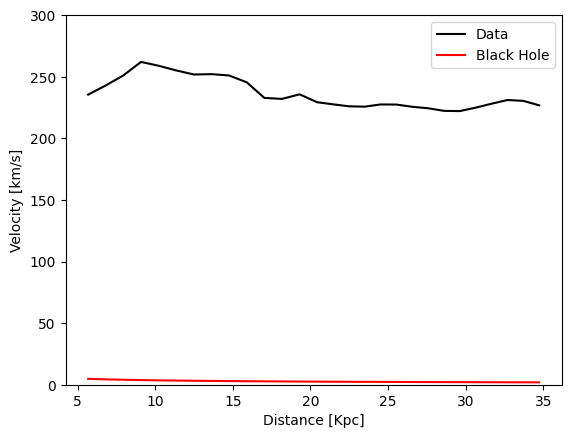

In [ ]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="Data")
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0,300)
plt.legend()

In [ ]:
def calculate_bulge_velocity(mass_bulge, radius_bulge):
  return(np.sqrt(ac.G * mass_bulge / radius_bulge))

In [ ]:
mass_bulge = 3e10 * u.solMass
radius_bulge = 3000 * u.parsec

In [ ]:
bulge_vel = calculate_bulge_velocity(mass_bulge, radius_bulge)
print(bulge_vel.to(u.km / u.s))

207.3865296984421 km / s


In [ ]:
bulge_vel = np.zeros(np.shape(dis)) * u.km / u.s

for i, radius in enumerate(dis):
  rad_bulge = radius * 1000 * u.parsec
  orb_vel = calculate_orbital_velocity(mass_bulge, rad_bulge)
  bulge_vel[i] = orb_vel

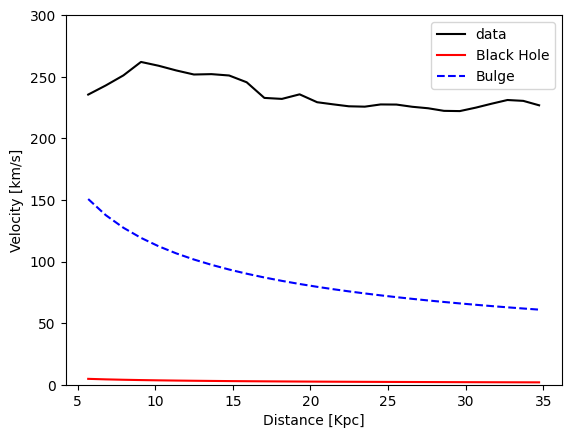

In [ ]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="data")
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")
plt.plot(dis, bulge_vel.value, color="blue", label="Bulge", linestyle= "dashed")
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0,300)
plt.legend()

In [ ]:
def calculate_disk_velocity(disk_density, radius):
  return(np.sqrt(ac.G * disk_density * np.pi * radius))

In [ ]:
disk_mass = 10e10 * u.solMass
disk_radius = 30 * 1000 * u.parsec
disk_density = disk_mass /(np.pi * disk_radius **2)
test_radius = 20e3 * u.parsec
disk_vel = calculate_disk_velocity(disk_density, test_radius)
print(disk_vel.to(u.km / u.s))

97.76294765100916 km / s


In [ ]:
disk_vel = np.zeros(np.shape(dis)) * u.km/u.s

for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec
  orb_vel= calculate_disk_velocity(disk_density, rad)
  disk_vel[i]= orb_vel

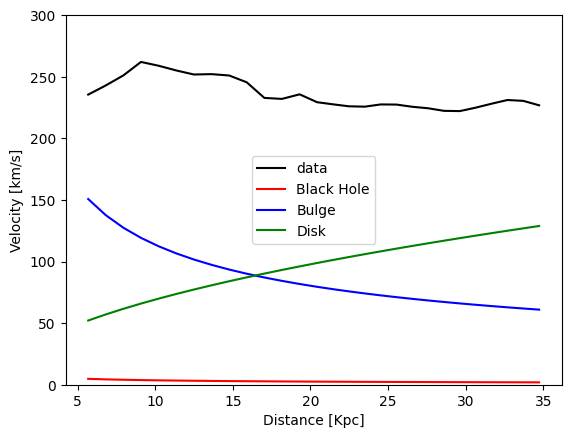

In [ ]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black",label="data")
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")
plt.plot(dis, bulge_vel.value, color="blue", label="Bulge")
plt.plot(dis, disk_vel.value, color="green", label="Disk")
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0,300)
plt.legend()

In [ ]:
def calculate_halo_velocity(halo_density, radius):
  return(np.sqrt(ac.G * halo_density * np.pi * 4/3 * (radius**2)))

In [ ]:
halo_mass = 8e11 * u.solMass
halo_radius = 35e3 * u.parsec
halo_density = halo_mass /(np.pi * 4/3 * (halo_radius)**3)
test_radi = 20e3 * u.parsec
halo_vel = calculate_halo_velocity(halo_density, test_radi)
print(halo_vel.to(u.km / u.s))

179.1651209295637 km / s


In [ ]:
halo_vel = np.zeros(np.shape(dis)) * u.km/u.s

for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec
  orb_vel = calculate_halo_velocity(halo_density, rad)
  halo_vel[i]= orb_vel
  print("The orbital velocity at", radius, "kpc=", orb_vel.to(u.km/u.s))

The orbital velocity at 5.68 kpc= 50.88289434399609 km / s
The orbital velocity at 6.81 kpc= 61.005723676516446 km / s
The orbital velocity at 7.95 kpc= 71.21813556950158 km / s
The orbital velocity at 9.08 kpc= 81.34096490202192 km / s
The orbital velocity at 10.22 kpc= 91.55337679500705 km / s
The orbital velocity at 11.35 kpc= 101.6762061275274 km / s
The orbital velocity at 12.49 kpc= 111.88861802051252 km / s
The orbital velocity at 13.62 kpc= 122.01144735303289 km / s
The orbital velocity at 14.76 kpc= 132.22385924601804 km / s
The orbital velocity at 15.89 kpc= 142.34668857853836 km / s
The orbital velocity at 17.03 kpc= 152.5591004715235 km / s
The orbital velocity at 18.16 kpc= 162.68192980404385 km / s
The orbital velocity at 19.3 kpc= 172.89434169702898 km / s
The orbital velocity at 20.43 kpc= 183.01717102954933 km / s
The orbital velocity at 21.45 kpc= 192.15459219695705 km / s
The orbital velocity at 22.47 kpc= 201.29201336436483 km / s
The orbital velocity at 23.5 kpc= 2

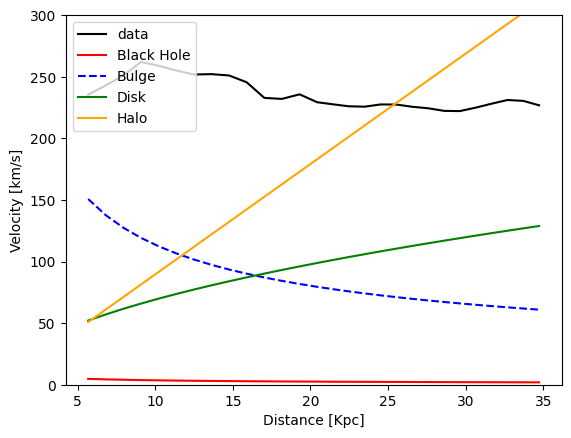

In [ ]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="data")
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")
plt.plot(dis, bulge_vel.value, color="blue", label="Bulge", linestyle= "dashed")
plt.plot(dis, disk_vel.value, color="green", label="Disk")
plt.plot(dis, halo_vel.value, color="orange", label="Halo")
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0,300)
plt.legend()

In [ ]:
def calculate_total_velocity(radius, disk_density, halo_density, mass_bulge, mass_bh):
  disk_mass = disk_density * (np.pi * radius ** 2)
  halo_mass = halo_density * ( 4/3 * np.pi * radius ** 3)
  return np.sqrt( ac.G * (disk_mass + halo_mass + mass_bulge + mass_bh) / radius)

In [ ]:
vel_total = np.zeros(np.shape(dis)) * u.km / u.s
mass_bh = 3e7 * u.solMass
mass_bulge = 3e10 * u.solMass
for i, radius in enumerate (dis):
  rad = radius * 1000 * u.parsec
  orb_vel = calculate_total_velocity(rad, disk_density, halo_density, mass_bulge, mass_bh )
  vel_total[i] = orb_vel
  print("The orbital velocity at ", radius, " kpc= ", orb_vel.to(u.km / u.s))

The orbital velocity at  5.68  kpc=  167.45821588681306 km / s
The orbital velocity at  6.81  kpc=  161.0645148455578 km / s
The orbital velocity at  7.95  kpc=  158.48429824345882 km / s
The orbital velocity at  9.08  kpc=  158.68140843233925 km / s
The orbital velocity at  10.22  kpc=  160.9458855499509 km / s
The orbital velocity at  11.35  kpc=  164.7465228215365 km / s
The orbital velocity at  12.49  kpc=  169.78980104977327 km / s
The orbital velocity at  13.62  kpc=  175.722435099343 km / s
The orbital velocity at  14.76  kpc=  182.44751778773278 km / s
The orbital velocity at  15.89  kpc=  189.69515904887479 km / s
The orbital velocity at  17.03  kpc=  197.47564557495397 km / s
The orbital velocity at  18.16  kpc=  205.5622780542729 km / s
The orbital velocity at  19.3  kpc=  214.0270556084123 km / s
The orbital velocity at  20.43  kpc=  222.6662825625956 km / s
The orbital velocity at  21.45  kpc=  230.64082677187952 km / s
The orbital velocity at  22.47  kpc=  238.75591361197

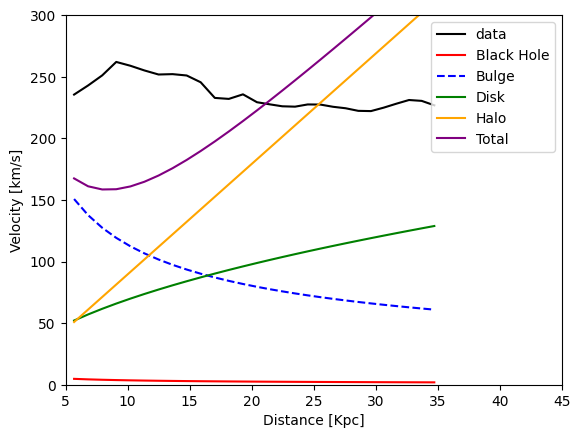

In [ ]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="data")
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")
plt.plot(dis, bulge_vel.value, color="blue", label="Bulge", linestyle= "dashed")
plt.plot(dis, disk_vel.value, color="green", label="Disk")
plt.plot(dis, halo_vel.value, color="orange", label="Halo")
plt.plot(dis, vel_total.value, color="purple", label="Total")
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0,300)
plt.xlim(5,45)
plt.legend()